# Stock market prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(pd.read_csv('data.csv', index_col = 'date', parse_dates = ['date']))

# Cleaning data

By plotting the signal and spy_close_price, we can detect obvious outliers.

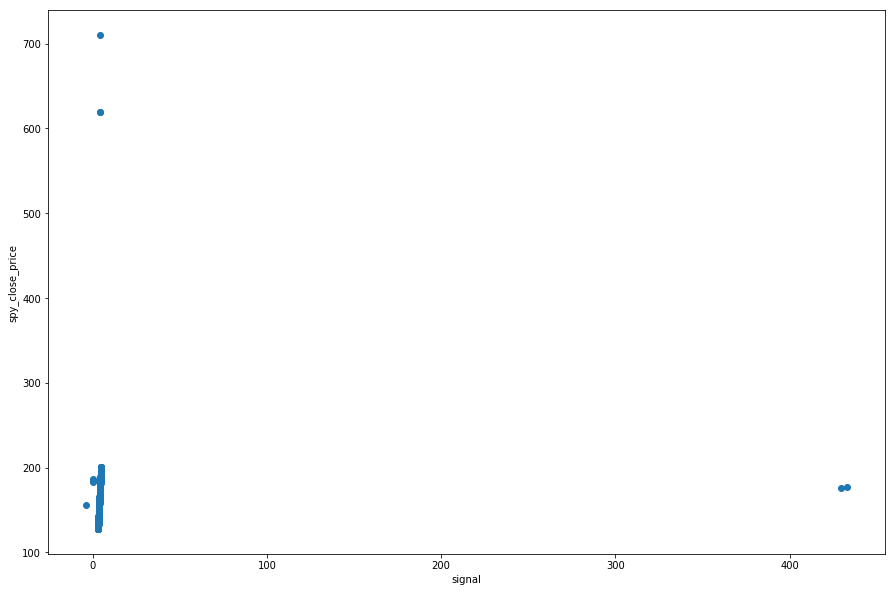

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.scatter(df['signal'], df['spy_close_price'])
plt.xlabel('signal')
plt.ylabel('spy_close_price')
plt.show()

Using box plot to remove outliers

In [3]:
cleaned_df = df

Q1 = cleaned_df.loc[:, 'spy_close_price'].quantile(0.25)
Q3 = cleaned_df.loc[:, 'spy_close_price'].quantile(0.75)
IQR = Q3 - Q1

Q1_ = cleaned_df.loc[:, 'signal'].quantile(0.25)
Q3_ = cleaned_df.loc[:, 'signal'].quantile(0.75)
IQR_ = Q3_ - Q1_

cleaned_df = cleaned_df[~((cleaned_df.loc[:, 'spy_close_price'] < (Q1 - 1.5 * IQR)) | (cleaned_df.loc[:, 'spy_close_price'] > (Q3 + 1.5 * IQR)))]
cleaned_df = cleaned_df[~((cleaned_df.loc[:, 'signal'] < (Q1_ - 1.5 * IQR_)) | (cleaned_df.loc[:, 'signal'] > (Q3_ + 1.5 * IQR_)))]

By plotting the cleaned data of signal and spy_close_price, it seems there is correlation between two

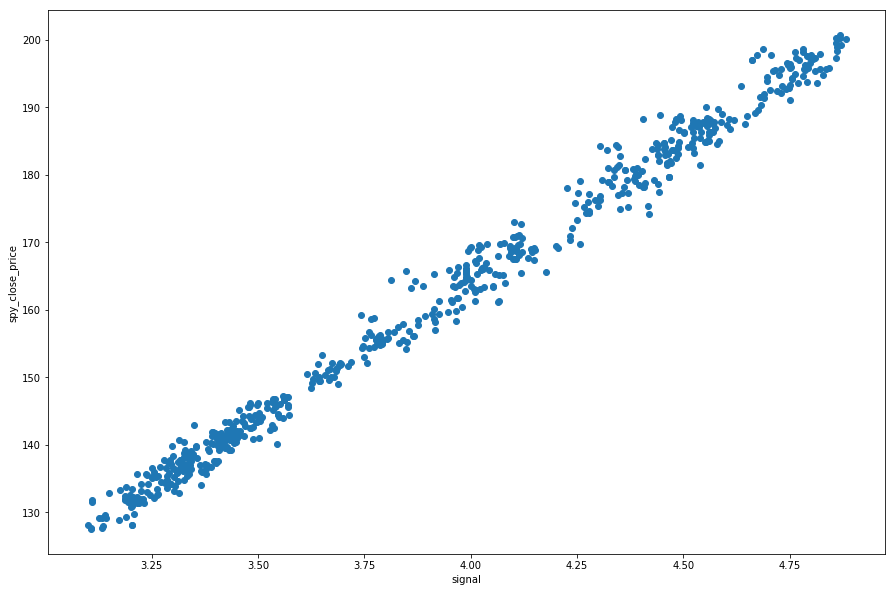

In [4]:
plt.scatter(cleaned_df['signal'], cleaned_df['spy_close_price'])
plt.xlabel('signal')
plt.ylabel('spy_close_price')
plt.show()

# Linear regression

Coefficients: [40.82405753]
Mean squared error: 4.54
R-squared: 0.561007


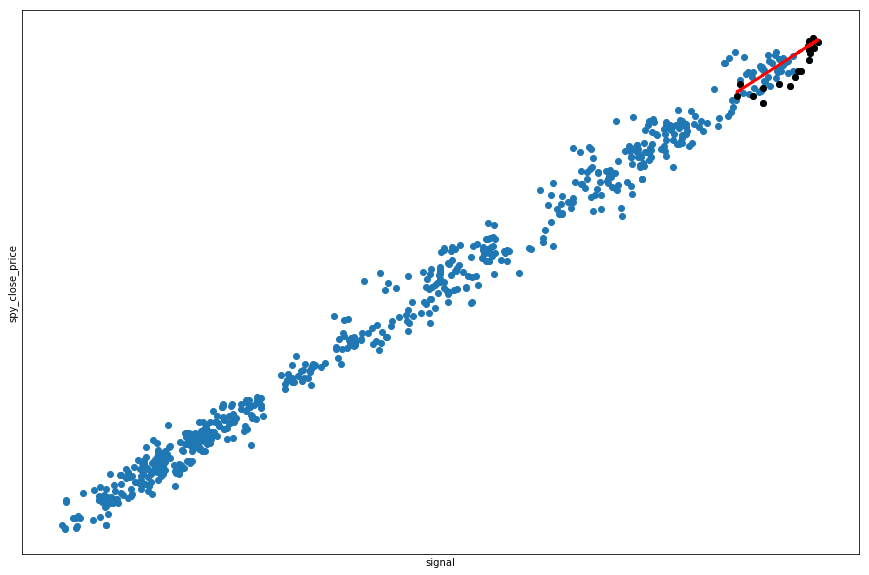

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = cleaned_df['signal'][:-20]
X_test = cleaned_df['signal'][-20:]

# Split the targets into training/testing sets
y_train = cleaned_df['spy_close_price'][:-20]
y_test = cleaned_df['spy_close_price'][-20:]

# Create linear regression object
regression = linear_model.LinearRegression()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train the model using the training sets
regression.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regression.predict(X_test)

# The coefficients
print('Coefficients:', regression.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(cleaned_df['signal'], cleaned_df['spy_close_price'])
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_pred, color = 'red', linewidth = 3)

plt.xlabel('signal')
plt.ylabel('spy_close_price')

plt.xticks(())
plt.yticks(())

plt.show()

Modeling with linear regression,

Mean squared error shows how well the line fits

R-Squared value shows how close the data fits the regression line

# SVM Regression

In [6]:
data = cleaned_df.sort_index(axis = 1, ascending = True)
data = data.iloc[::-1]
d = data[['spy_close_price']]

split_date = pd.Timestamp('02-19-2014')

# Split the data into training/testing sets
train = d.loc[:split_date]
test = d.loc[split_date:]

Normalizing the dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler

# transforms features by scaling each feature to a given range
scaler = MinMaxScaler()

scaler_train = scaler.fit_transform(train)
scaler_test = scaler.transform(test)

scaler_train_df = pd.DataFrame(scaler_train, columns = ['Y'], index = train.index)
scaler_test_df = pd.DataFrame(scaler_test, columns = ['Y'], index = test.index)

for s in range(1, 2):
    scaler_train_df['X_{}'.format(s)] = scaler_train_df['Y'].shift(s)
    scaler_test_df['X_{}'.format(s)] = scaler_test_df['Y'].shift(s)

X_train = scaler_train_df.dropna().drop('Y', axis = 1)
y_train = scaler_train_df.dropna().drop('X_1', axis = 1)
X_test = scaler_test_df.dropna().drop('Y', axis = 1)
y_test = scaler_test_df.dropna().drop('X_1', axis = 1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

C:\Users\and31\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\and31\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\and31\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\and31\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


C:\Users\and31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared: -5.207293


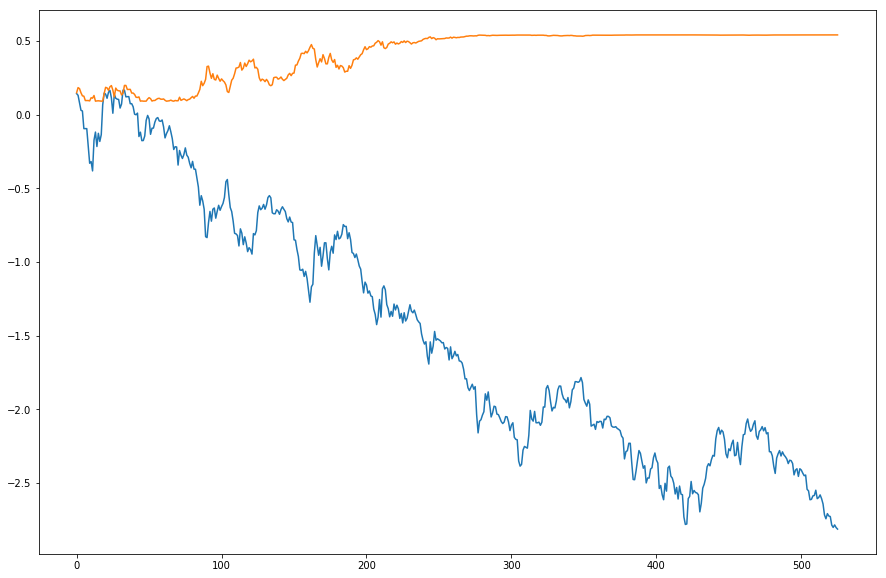

In [8]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

regr = SVR(kernel = 'rbf')

regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

r2_score = r2_score(y_test, y_pred)
print("R-squared: %f" % r2_score)

plt.plot(y_test)
plt.plot(y_pred)
plt.show()

R-squared value is negative. It shows that this model does not follow the trend of the data.

citation: https://github.com/neelabhpant/Deep-Learning-in-Python/blob/master/Time%20Series%20Prediction.ipynb

# Random Forest

In [9]:
rf_df = cleaned_df
rf_df.reset_index(inplace = True)

normalizing data

In [10]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# convert dates to numeric values
encoder = LabelEncoder()
rf_df['date'] = encoder.fit_transform(rf_df['date'])
rf_df = rf_df.astype('float32')

# normalize the data
min_max_scaler_ = MinMaxScaler()
scaled_ = min_max_scaler_.fit_transform(rf_df)

# 80% of data for train, 20% for test
test_train_split = int(scaled_.shape[0]*0.8)
train_ = scaled_[:test_train_split, :]
test_ = scaled_[test_train_split:, :]

# split into input and outputs
X_train_, y_train_ = train_[:, :-1], train_[:, -1]
X_test_, y_test_ = test_[:, :-1], test_[:, -1]

Date and signal are the input features and the spy_close_price is the target

In [11]:
from sklearn.ensemble import RandomForestRegressor

# build the regessor model
regressor = RandomForestRegressor()
regressor.fit(X_train_, y_train_)
y_pred_ = regressor.predict(X_test_)
y_pred_ = y_pred_.reshape(y_pred_.shape[0], 1)

# invert scaling for the prediction
pred = np.concatenate((X_test_,y_pred_), axis = 1)
inv_pred = scaler.inverse_transform(pred)
inv_pred = inv_pred[:, -1]

# invert scaling for actual
y_test_ = y_test_.reshape(y_test_.shape[0], 1)
actual = np.concatenate((X_test_, y_test_), axis = 1)
inv_actual = scaler.inverse_transform(actual)
inv_actual = inv_actual[:, -1]

C:\Users\and31\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Mean squared error: 5.658
R-squared: -2.281


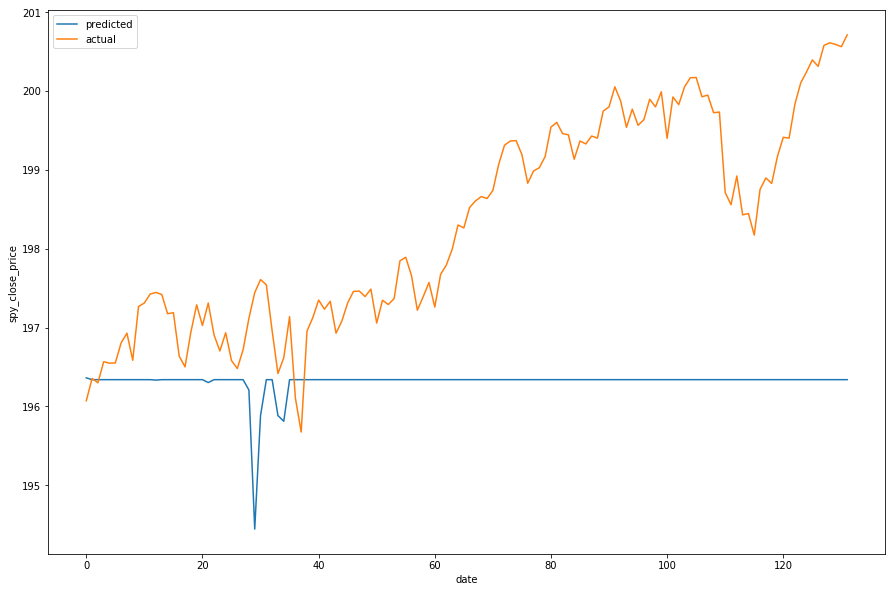

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(inv_actual, inv_pred)
print('Mean squared error: %.3f' % mse)
r2_score = r2_score(inv_actual, inv_pred)
print('R-squared: %.3f' % r2_score)

# plot the results
plt.xlabel('date')
plt.ylabel('spy_close_price')
plt.plot(inv_pred, label = 'predicted')
plt.plot(inv_actual, label = 'actual')
plt.legend()
plt.show()

The value of the MSE is small but as we can see the R-squared value and the graph, the model does not making a good prediction

citation: https://github.com/soumya1995/stock-market-predictor/blob/master/Random%20Forest%20%26%20Neural%20Network.ipynb

# Conclusion

I used linear regression, support vector regressor, and random forest regressor. 

As R-squared is a statistical measure of how close the data are to the fitted regression line, I got R-squared value from each of the model.

Each of the R-squared value is 

Linear regression: 0.561007

Support vector regressor: -5.207293

Random forest regressor: -2.295

Compare those three, linear regression has better R-squared value, but still not that good fit. Also, R-squared value does not ensure that the model is good fit.

The regression models I used were not a good prediction for the stock market prediction